### Preprocessing


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tarfile
from google.colab import drive
import os
import pandas as pd
import csv
from shutil import copyfile, copy2, copy
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
from numpy import argmax
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
from keras_preprocessing.image import ImageDataGenerator
from textwrap import wrap
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall, AUC, CategoricalCrossentropy
from tensorflow_addons.metrics import F1Score
import json
import datetime
from tensorflow.keras.preprocessing import image

In [3]:
tar = tarfile.open("/content/drive/My Drive/Colab Notebooks/datasets/freiburg_groceries_dataset.tar.gz", "r")
tar.extractall('/content')

In [4]:
dataset_path = '/content/images'
new_path = '/content/freiburg_groceries'
train_path = '/content/freiburg_groceries/train'
validation_path = '/content/freiburg_groceries/validation'
evaluation_path = '/content/freiburg_groceries/evaluation'

if not os.path.exists(new_path):
    os.makedirs(new_path)

if not os.path.exists(train_path):
    os.makedirs(train_path)
    os.makedirs(os.path.join(train_path, 'images'))

if not os.path.exists(validation_path):
    os.makedirs(validation_path)
    os.makedirs(os.path.join(validation_path, 'images'))

if not os.path.exists(evaluation_path):
    os.makedirs(evaluation_path)
    os.makedirs(os.path.join(evaluation_path, 'images'))

In [5]:
dataset = {
  'file_name': [], 
  'label': []
}

for product in os.listdir(dataset_path)[:5]:
  for product_file in os.listdir(os.path.join(dataset_path, product)):
    dataset['file_name'].append(os.path.join(dataset_path, product, product_file))
    dataset['label'].append(product)

dataset_df = pd.DataFrame(dataset, columns=['file_name', 'label'])
#dataset_df

In [6]:
train_validate_filenames, evaluation_filenames, train_validate_labels, evaluation_labels = train_test_split(dataset_df['file_name'], dataset_df['label'], train_size=0.8, random_state=42, stratify=dataset_df['label'])

train_validate_df = pd.DataFrame(zip(train_validate_filenames, train_validate_labels), columns=['file_name', 'label'])
#print(train_test_df)

train_filenames, validation_filenames, train_labels, validation_labels = train_test_split(train_validate_df['file_name'], train_validate_df['label'], train_size=0.875, random_state=42, stratify=train_validate_df['label'])

train_df = pd.DataFrame(zip(train_filenames, train_labels), columns=['file_name', 'label'])
#print(train_df)

validation_df = pd.DataFrame(zip(validation_filenames, validation_labels), columns=['file_name', 'label'])
#print(validation_df)

evaluation_df = pd.DataFrame(zip(evaluation_filenames, evaluation_labels), columns=['file_name', 'label'])
#print(validation_df)

In [10]:
with open(os.path.join(train_path, 'train.csv'), mode='w') as dataset_file:
    dataset_writer = csv.writer(dataset_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    dataset_writer.writerow(['file_name', 'label'])
    for file_name, label in zip(train_filenames, train_labels):
        split = file_name.split('/')
        dataset_writer.writerow([split[-1], label])
        copyfile(file_name, os.path.join(train_path, 'images', split[-1]))

In [11]:
with open(os.path.join(validation_path, 'validation.csv'), mode='w') as dataset_file:
    dataset_writer = csv.writer(dataset_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    dataset_writer.writerow(['file_name', 'label'])
    for file_name, label in zip(validation_filenames, validation_labels):
        split = file_name.split('/')
        dataset_writer.writerow([split[-1], label])
        copyfile(file_name, os.path.join(validation_path, 'images', split[-1]))

In [12]:
with open(os.path.join(evaluation_path, 'evaluation.csv'), mode='w') as dataset_file:
    dataset_writer = csv.writer(dataset_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    dataset_writer.writerow(['file_name', 'label'])
    for file_name, label in zip(evaluation_filenames, evaluation_labels):
        split = file_name.split('/')
        dataset_writer.writerow([split[-1], label])
        copyfile(file_name, os.path.join(evaluation_path, 'images', split[-1]))

## Defining data augmentations

In [13]:
def training_data(file, path):
  global W_SUM
  global H_SUM
  img = cv2.imread(os.path.join(path, 'images', file),cv2.IMREAD_COLOR)
  shape = np.array(img).shape
  W_SUM += shape[0]
  H_SUM += shape[1]
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  X.append(np.array(img))

def invert_image(img):
  return (255-img)

Found 875 validated image filenames belonging to 5 classes.
Found 126 validated image filenames belonging to 5 classes.
Found 251 validated image filenames belonging to 5 classes.
[[[0.06666667 0.05882353 0.04705883]
  [0.06666667 0.05882353 0.04705883]
  [0.06666667 0.05882353 0.04705883]
  ...
  [0.23529413 0.22352943 0.19215688]
  [0.23529413 0.22352943 0.19215688]
  [0.2392157  0.22352943 0.19215688]]

 [[0.05490196 0.04705883 0.03921569]
  [0.05490196 0.0509804  0.03921569]
  [0.05882353 0.0509804  0.04313726]
  ...
  [0.23529413 0.22352943 0.19215688]
  [0.2392157  0.22352943 0.19215688]
  [0.2392157  0.22352943 0.19215688]]

 [[0.04705883 0.04313726 0.03529412]
  [0.04705883 0.04313726 0.03529412]
  [0.04705883 0.04705883 0.03529412]
  ...
  [0.23529413 0.22352943 0.19215688]
  [0.23529413 0.22352943 0.19215688]
  [0.2392157  0.22352943 0.19607845]]

 ...

 [[0.427451   0.427451   0.42352945]
  [0.427451   0.427451   0.41960788]
  [0.427451   0.427451   0.41960788]
  ...
  [0.42

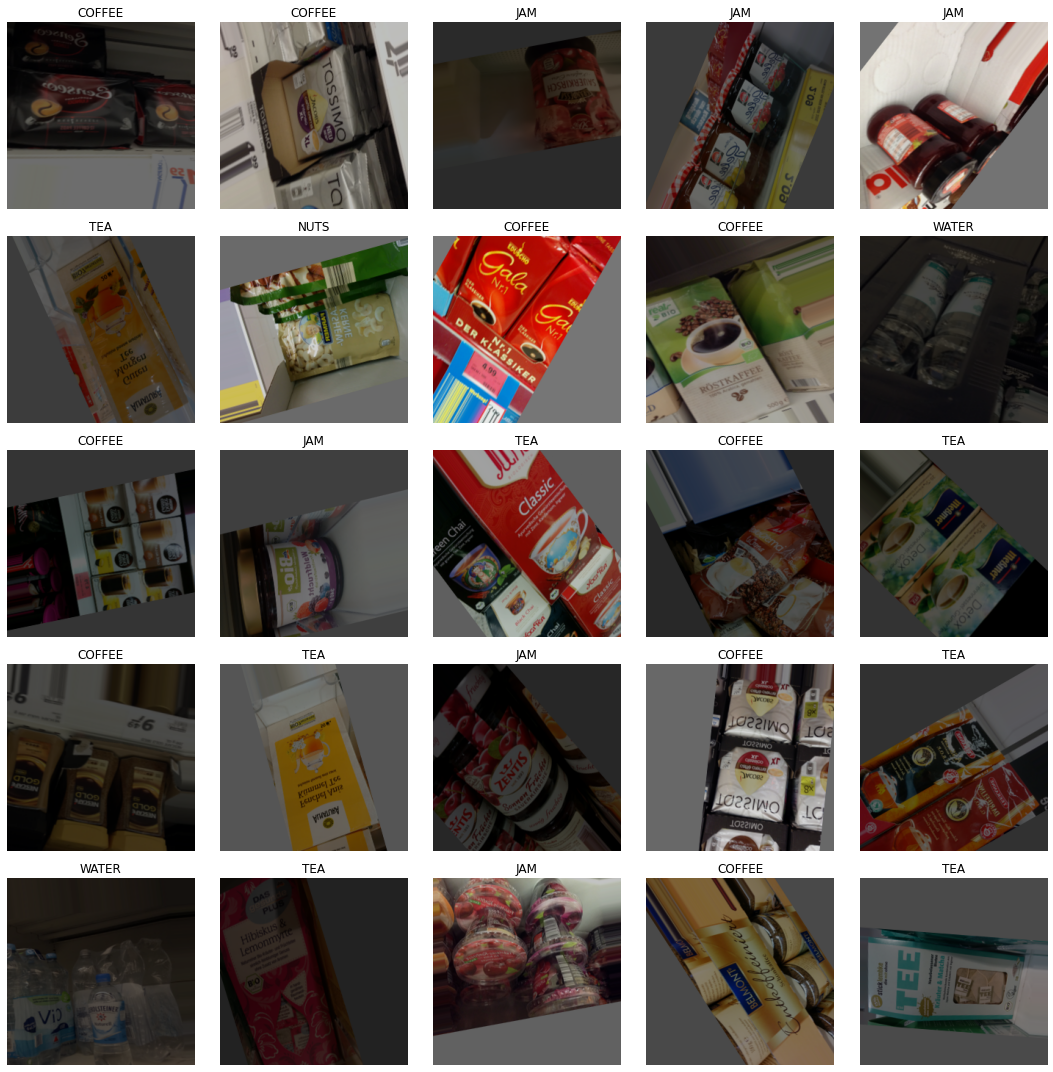

In [40]:
%matplotlib inline

IMG_SIZE = 256
BATCH_SIZE = 128

train_df = pd.read_csv(os.path.join(train_path, 'train.csv'))
validation_df = pd.read_csv(os.path.join(validation_path, 'validation.csv'))
evaluation_df = pd.read_csv(os.path.join(evaluation_path, 'evaluation.csv'))

#X = []
#global W_SUM
#global H_SUM
#W_SUM = 0
#H_SUM = 0
#for file in train_df['file_name']:
#  training_data(file, path = train_path)

#for file in validation_df['file_name']:
#  training_data(file, path = validation_path)
  
#X = np.array(X)
#X=X/255

#print(W_SUM / X.shape[0])
#print(H_SUM / X.shape[0])
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=90,  
    zoom_range = 0.2,
    shear_range = 0.2,
    width_shift_range=0.2,  
    height_shift_range=0.2,
    brightness_range=[0.2,1.0],
    horizontal_flip=True,  
    vertical_flip=True,
    rescale=1. / 255)

#train_datagen.fit(X)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

#validation_datagen.fit(X)

evaluation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df, directory=os.path.join(train_path, 'images'), x_col="file_name", y_col="label", class_mode="categorical", target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE)

validation_generator = validation_datagen.flow_from_dataframe(dataframe=validation_df, directory=os.path.join(validation_path, 'images'), x_col="file_name", y_col="label", class_mode="categorical", target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE)

evaluation_generator  = evaluation_datagen.flow_from_dataframe(dataframe=evaluation_df, directory=os.path.join(evaluation_path, 'images'), x_col="file_name", y_col="label", class_mode="categorical", target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE)

x,y = train_generator.next()

fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
num = 0
for i in range(5):
  for j in range (5):
    ax[i,j].imshow(x[num])
    mydict = evaluation_generator.class_indices
    inverted = list(mydict.keys())[list(mydict.values()).index(argmax(y[num]))]
    ax[i,j].set_title("\n".join(wrap(inverted, 10)))
    ax[i,j].axis('off')
    num += 1
  num += 1
        
plt.tight_layout()

In [15]:
evaluation_generator.class_indices

{'COFFEE': 0, 'JAM': 1, 'NUTS': 2, 'TEA': 3, 'WATER': 4}

In [16]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.InceptionResNetV2(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet',
                                         )

219062272/219055592 [==============================] - 4s 0us/step


In [17]:
base_model.trainable = False
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [18]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
global_max_layer = tf.keras.layers.GlobalMaxPooling2D()
dropout_layer = tf.keras.layers.Dropout(0.4)
prediction_layer = tf.keras.layers.Dense(5)
activation_layer = tf.keras.layers.Activation('softmax')

In [19]:
num_classes = len(train_generator.class_indices)
metrics = [CategoricalAccuracy(name='categorical_accuracy'),
    Precision(name='precision'),
    Recall(name='recall'),
    AUC(name='auc'),
    CategoricalCrossentropy(label_smoothing=0.3),
    F1Score(name='f1score',num_classes=num_classes)]

In [20]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dropout_layer,
  prediction_layer,
  activation_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=metrics)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 6, 6, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 7685      
_________________________________________________________________
activation_203 (Activation)  (None, 5)                 0         
Total params: 54,344,421
Trainable params: 7,685
Non-trainable params: 54,336,736
_________________________________________________________________


In [21]:
num_epochs = 100

history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/100
7/7 [==============================] - 25s 4s/step - loss: 1.8377 - categorical_accuracy: 0.2606 - precision: 0.2948 - recall: 0.0846 - auc: 0.5487 - categorical_crossentropy: 1.8686 - f1score: 0.2274 - val_loss: 1.4787 - val_categorical_accuracy: 0.3413 - val_precision: 1.0000 - val_recall: 0.0397 - val_auc: 0.6787 - val_categorical_crossentropy: 1.5486 - val_f1score: 0.3129
Epoch 2/100
7/7 [==============================] - 18s 3s/step - loss: 1.7210 - categorical_accuracy: 0.2937 - precision: 0.3379 - recall: 0.0846 - auc: 0.5920 - categorical_crossentropy: 1.7774 - f1score: 0.2715 - val_loss: 1.3934 - val_categorical_accuracy: 0.4603 - val_precision: 1.0000 - val_recall: 0.0556 - val_auc: 0.7472 - val_categorical_crossentropy: 1.4895 - val_f1score: 0.4500
Epoch 3/100
7/7 [==============================] - 18s 3s/step - loss: 1.6020 - categorical_accuracy: 0.3326 - precision: 0.4730 - recall: 0.1200 - auc: 0.6378 - categorical_crossentropy: 1.6969 - f1score: 0.3110 - val

In [22]:
model.evaluate(evaluation_generator)

2/2 [==============================] - 5s 2s/step - loss: 0.5320 - categorical_accuracy: 0.8048 - precision: 0.8651 - recall: 0.7410 - auc: 0.9645 - categorical_crossentropy: 1.5145 - f1score: 0.8031


[0.531981348991394,
 0.804780900478363,
 0.8651162981987,
 0.7410358786582947,
 0.9645045399665833,
 1.5145273208618164,
 array([0.7603305 , 0.81188124, 0.7529412 , 0.7391305 , 0.9514563 ],
       dtype=float32)]

In [ ]:
hist_df = pd.DataFrame(history.history) 

# save history to json:  
hist_json_file = '/content/drive/My Drive/Colab Notebooks/models/grozi120/history/InceptionResNetV2_imagenet_19_06_20_13_35_08_history.json'
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

In [ ]:
model_path =  '/content/drive/My Drive/Colab Notebooks/models/grozi120/InceptionResNetV2_imagenet_{}.h5'.format(datetime.datetime.now().strftime("%d_%m_%y_%H_%M_%S"))
model.save(model_path) 
#model.load_weights('/content/drive/My Drive/Colab Notebooks/models/grozi5/InceptionResNetV2_imagenet_19_06_20_11_36_20.h5')

In [43]:
results = {}
labels_ = evaluation_df.groupby("label")
for label in labels_:
  print("\n Next Class:")
  print(label[0])
  print("\n")
  count_all = 0
  count_correct = 0
  for path in label[1]["file_name"]:
    img = image.load_img(os.path.join(evaluation_path, 'images', path), target_size=(IMG_SIZE, IMG_SIZE))
    x = np.array(img).astype('float32')/255
    x = np.expand_dims(x, axis=0)
    p = model.predict(x)
    predicted = list(mydict.keys())[list(mydict.values()).index(argmax(p))]
    actual = label[0]
    print("Predicted: " + predicted + "  -----  Actual: " + actual)
    count_all += 1
    if predicted == actual:
      count_correct += 1
  results[label[0]] = count_correct/count_all
  print(len(results))
print(results)


 Next Class:
COFFEE


Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: NUTS  -----  Actual: COFFEE
Predicted: JAM  -----  Actual: COFFEE
Predicted: TEA  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: NUTS  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: JAM  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: JAM  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted: COFFEE  -----  Actual: COFFEE
Predicted